In [1]:
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
# import cv2
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

keras = tf.keras


In [2]:
directory = 'data/archive'

In [3]:
# !mkdir -p saved_models

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=78,
  image_size=(50,50),
  batch_size=32)

Found 277524 files belonging to 2 classes.
Using 222020 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=78,
  image_size=(50, 50),
  batch_size=32)

Found 277524 files belonging to 2 classes.
Using 55504 files for validation.


In [6]:
train_class_names = train_ds.class_names
print(train_class_names)

['idc', 'non_idc']


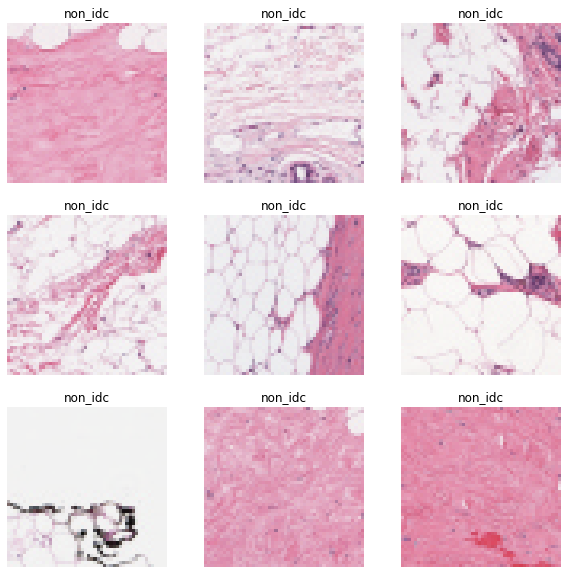

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

In [8]:
val_class_names = val_ds.class_names
print(val_class_names)

['idc', 'non_idc']


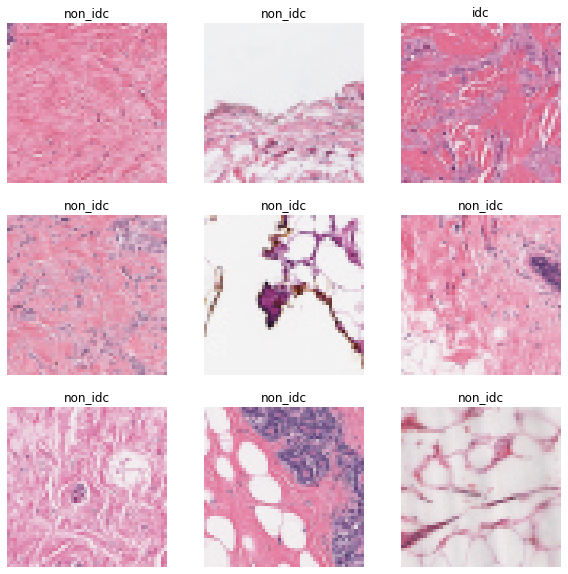

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_class_names[labels[i]])
    plt.axis("off")

**Models**

Model 1

In [10]:
num_classes = 2

model1 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model1.compile(
  optimizer='adam',
  loss='SparseCategoricalCrossentropy',
  metrics=['accuracy'])

In [12]:
model1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [10]:
model_1 = model1.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/5
6939/6939 [==============================] - 286s 41ms/step - loss: 0.6934 - accuracy: 0.7145 - val_loss: 0.6932 - val_accuracy: 0.7147
Epoch 2/5
6939/6939 [==============================] - 281s 40ms/step - loss: 0.6932 - accuracy: 0.7164 - val_loss: 0.6932 - val_accuracy: 0.7147
Epoch 3/5
6939/6939 [==============================] - 274s 39ms/step - loss: 0.6932 - accuracy: 0.7164 - val_loss: 0.6932 - val_accuracy: 0.7147
Epoch 4/5
6939/6939 [==============================] - 273s 39ms/step - loss: 0.6932 - accuracy: 0.7164 - val_loss: 0.6932 - val_accuracy: 0.7147
Epoch 5/5
6939/6939 [==============================] - 273s 39ms/step - loss: 0.6932 - accuracy: 0.7164 - val_loss: 0.6932 - val_accuracy: 0.7147


In [16]:
model_1.save('saved_models/model_1')

AttributeError: 'History' object has no attribute 'save'

In [10]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()



In [ ]:
# list all data in history
print(model_1.history.keys())

plotmodelhistory(model_1) 

Model 2

In [11]:
num_classes = 2

model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
model_2 = model2.fit(train_ds,validation_data=val_ds, epochs=7)

Epoch 1/7
6939/6939 [==============================] - 292s 42ms/step - loss: 0.3871 - accuracy: 0.8331 - val_loss: 0.3802 - val_accuracy: 0.8299
Epoch 2/7
6939/6939 [==============================] - 278s 40ms/step - loss: 0.3464 - accuracy: 0.8525 - val_loss: 0.3639 - val_accuracy: 0.8480
Epoch 3/7
6939/6939 [==============================] - 301s 43ms/step - loss: 0.3336 - accuracy: 0.8580 - val_loss: 0.3438 - val_accuracy: 0.8555
Epoch 4/7
6939/6939 [==============================] - 307s 44ms/step - loss: 0.3263 - accuracy: 0.8616 - val_loss: 0.3489 - val_accuracy: 0.8542
Epoch 5/7
6939/6939 [==============================] - 302s 43ms/step - loss: 0.3207 - accuracy: 0.8645 - val_loss: 0.3348 - val_accuracy: 0.8624
Epoch 6/7
6939/6939 [==============================] - 300s 43ms/step - loss: 0.3171 - accuracy: 0.8652 - val_loss: 0.3344 - val_accuracy: 0.8633
Epoch 7/7
6939/6939 [==============================] - 291s 42ms/step - loss: 0.3135 - accuracy: 0.8674 - val_loss: 0.3263 -

In [15]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0

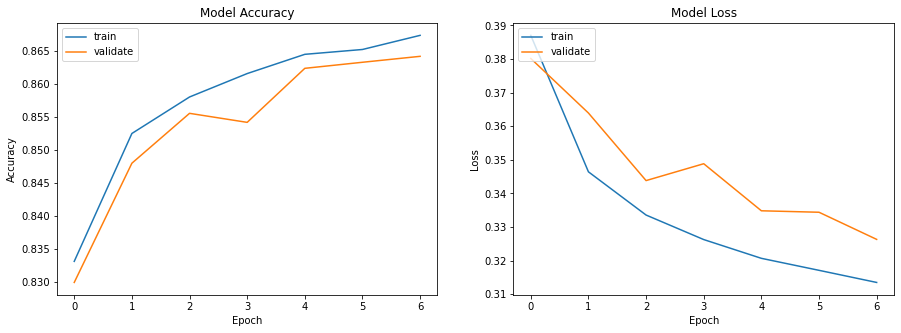

In [16]:
plotmodelhistory(model_2) 

Model 3

In [21]:
num_classes = 2

model3 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])

In [22]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
model_3 = model3.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/5
6939/6939 [==============================] - 287s 41ms/step - loss: 0.5969 - accuracy: 0.7163 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 2/5
6939/6939 [==============================] - 286s 41ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 3/5
6939/6939 [==============================] - 289s 42ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 4/5
6939/6939 [==============================] - 282s 41ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148
Epoch 5/5
6939/6939 [==============================] - 283s 41ms/step - loss: 0.5964 - accuracy: 0.7164 - val_loss: 0.5978 - val_accuracy: 0.7148


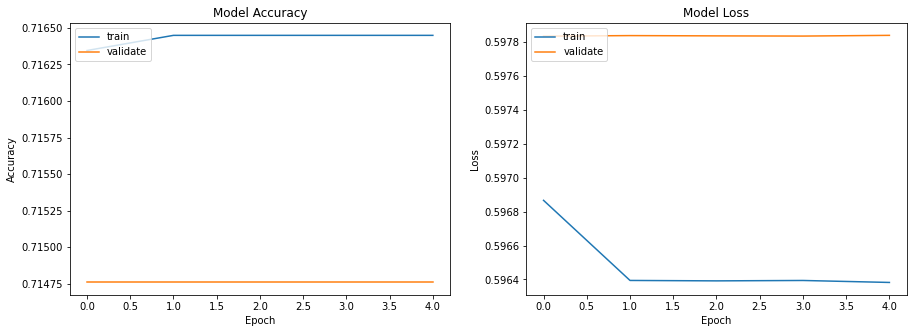

In [24]:
plotmodelhistory(model_3) 

In [41]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)         